# PyTorch for CIFAR10
We test VGG classifier.
First init some basic environment.

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# VGG13 classifier

In [10]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10_solver import CIFAR10Solver, plot_history
from classifiers.vgg import VGG11, VGG13

vgg13 = VGG13()
print(vgg13)

_VGG(
  (layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),

# train

In [11]:
%%time
opt = optim.SGD(vgg13.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4, nesterov=True)
loss_fn = nn.CrossEntropyLoss()
solver = CIFAR10Solver(vgg13, opt, loss_fn)
# reduce_lr = lambda epoch: 0.5 ** (epoch // 15)
# lr_scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=[reduce_lr])
# lr_scheduler = optim.lr_scheduler.MultiStepLR(opt, milestones=[80, 90], gamma=0.1)

lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', factor=0.5)

history = solver.train(epochs=150, lr_scheduler=lr_scheduler, train_batch_size=128)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0
start training. epoch steps: 352
Epoch: 1/150, lr:1.00e-01
[##################################################] 100.00% loss:2.2 acc:15.79% val_loss:2.0 val_acc:22.24%
Epoch: 2/150, lr:1.00e-01
[##################################################] 100.00% loss:1.7 acc:35.51% val_loss:1.6 val_acc:42.52%
Epoch: 3/150, lr:1.00e-01
[##################################################] 100.00% loss:1.3 acc:53.74% val_loss:1.4 val_acc:53.34%
Epoch: 4/150, lr:1.00e-01
[##################################################] 100.00% loss:0.96 acc:65.90% val_loss:0.89 val_acc:68.96%
Epoch: 5/150, lr:1.00e-01
[##################################################] 100.00% loss:0.81 acc:72.03% val_loss:0.85 val_acc:71.08%
Epoch: 6/150, lr:1.00e-01
[##################################################] 100.00% loss:0.71 acc:75.55% val_loss:0.79 val_acc:73.02%
Epoch: 7/150,

[##################################################] 100.00% loss:0.22 acc:92.54% val_loss:0.4 val_acc:86.94%
Epoch: 60/150, lr:5.00e-02
[##################################################] 100.00% loss:0.22 acc:92.48% val_loss:0.36 val_acc:89.00%
Epoch: 61/150, lr:5.00e-02
[##################################################] 100.00% loss:0.22 acc:92.52% val_loss:0.4 val_acc:87.18%
Epoch: 62/150, lr:5.00e-02
[##################################################] 100.00% loss:0.22 acc:92.40% val_loss:0.37 val_acc:88.50%
Epoch: 63/150, lr:5.00e-02
[##################################################] 100.00% loss:0.23 acc:92.21% val_loss:0.41 val_acc:86.72%
Epoch: 64/150, lr:5.00e-02
[##################################################] 100.00% loss:0.22 acc:92.41% val_loss:0.54 val_acc:84.90%
Epoch: 65/150, lr:5.00e-02
[##################################################] 100.00% loss:0.23 acc:92.22% val_loss:0.45 val_acc:85.88%
Epoch: 66/150, lr:5.00e-02
[###################################

[##################################################] 100.00% loss:0.0032 acc:99.93% val_loss:0.26 val_acc:94.02%
Epoch: 119/150, lr:1.56e-03
[##################################################] 100.00% loss:0.003 acc:99.94%% val_loss:0.26 val_acc:94.20%
Epoch: 120/150, lr:1.56e-03
[##################################################] 100.00% loss:0.0024 acc:99.96% val_loss:0.27 val_acc:94.08%
Epoch: 121/150, lr:1.56e-03
[##################################################] 100.00% loss:0.0028 acc:99.95% val_loss:0.27 val_acc:94.06%
Epoch: 122/150, lr:1.56e-03
[##################################################] 100.00% loss:0.0025 acc:99.96% val_loss:0.27 val_acc:94.00%
Epoch: 123/150, lr:1.56e-03
[##################################################] 100.00% loss:0.002 acc:99.97% val_loss:0.27 val_acc:94.04%
Epoch: 124/150, lr:1.56e-03
[##################################################] 100.00% loss:0.0022 acc:99.97% val_loss:0.27 val_acc:93.90%
Epoch: 125/150, lr:1.56e-03
[#############

# plot loss history
We check the classifier by plotting the loss and acc.

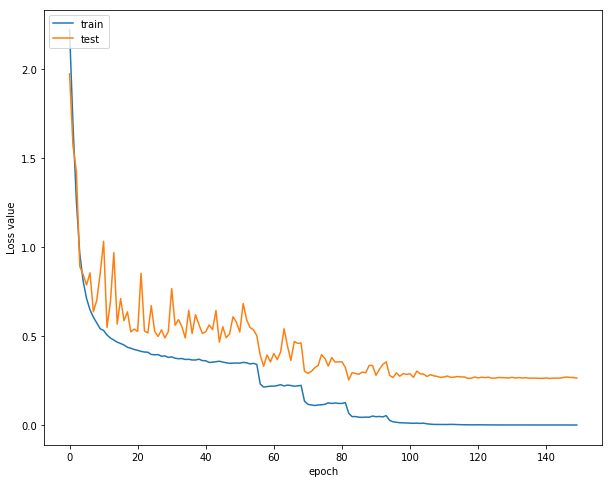

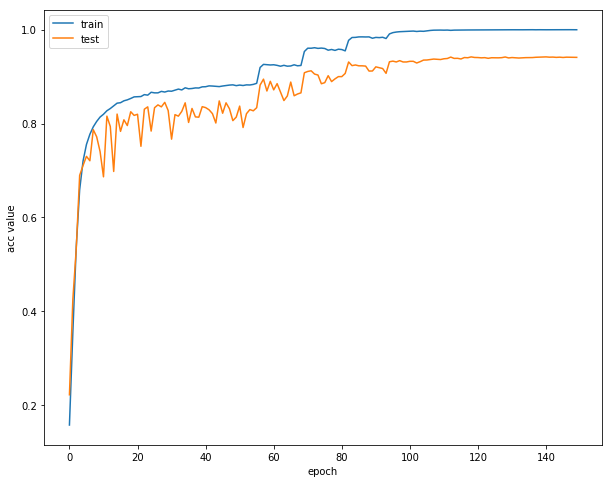

In [12]:
plot_history(history)

# test

In [13]:
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.2} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:0.26 test_acc:94.10%
